# Text mining and text summarization project  from 1980 - 2019


In [2]:
!python --version

Python 3.6.7 :: Anaconda custom (64-bit)


In [3]:
# all imports
import numpy as np
import pandas as pd
import matplotlib.pyplot
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [4]:
# Load data
# We'll use read_csv from pandas and the file entries separated by spaces
author_info = pd.read_csv("Kenyapapers.csv", sep="\t", dtype=
                          {'title': np.str})

In [5]:
author_info.dtypes

title         object
year         float64
journal       object
lastname      object
firstname     object
address       object
email         object
pmid           int64
month        float64
day          float64
dtype: object

In [6]:
# preview the data
# see the first columns of the data with .head(), last columns with .tail and the dimensionality of the dataset with .shape
df_head = author_info.head()
df_tail = author_info.tail()
df_title = author_info.title.head(6).transpose()
df_dimensions = author_info.shape

print("Load data using pandas these are the first 5 observations: \n \n {} \n\n Here are the last five observations: {} \n\n See some of the entries in the title column {} \n\nLastly here are the number of rows and columns: {}".format(df_head, df_tail, df_title, df_dimensions))

Load data using pandas these are the first 5 observations: 
 
                                                title    year  \
0  Current Trends of Nanobiosensors for Point-of-...  2019.0   
1  Current Trends of Nanobiosensors for Point-of-...  2019.0   
2  Efficacy of Ivermectin, Liquid Paraffin, and C...  2019.0   
3  Efficacy of Ivermectin, Liquid Paraffin, and C...  2019.0   
4  Efficacy of Ivermectin, Liquid Paraffin, and C...  2019.0   

                                      journal  lastname  firstname  \
0  Journal of analytical methods in chemistry      Noah   Naumih M   
1  Journal of analytical methods in chemistry  Ndangili    Peter M   
2                Journal of tropical medicine    Ogolla  Kennedy O   
3                Journal of tropical medicine    Chebet      Joyce   
4                Journal of tropical medicine   Waruiru   Robert M   

                                             address email      pmid  month  \
0  School of Pharmacy and Health Sciences, United...

The column on title has spacing, capitalization adn some repetition because of the way the data was collected. Let's deal with that problem using the `drop_duplicates` from pandas.

In [7]:
# remove duplicate rows on the title column and keep only the first instance
df_title_full = author_info.drop_duplicates("title", keep="first")

In [8]:
# see the pandas dataframe on the default display capabilities
df_title_full

,title,year,journal,lastname,firstname,address,email,pmid,month,day
0,Current Trends of Nanobiosensors for Point-of-...,2019.0,Journal of analytical methods in chemistry,Noah,Naumih M,"School of Pharmacy and Health Sciences, United...",NaN,31886019,1.0,1.0
2,"Efficacy of Ivermectin, Liquid Paraffin, and C...",2019.0,Journal of tropical medicine,Ogolla,Kennedy O,"Department of Veterinary Pathology, Microbiolo...",NaN,31885634,1.0,1.0
8,UHC2030's Contributions to Global Health Gover...,2019.0,Health and human rights,Maleche,Allan,Executive Director of the Kenya Legal & Ethica...,NaN,31885453,12.0,1.0
9,Implementation research for public sector ment...,2019.0,BMC psychiatry,Levy,Rachel,"Medical School, University of California, San ...",NaN,31883526,12.0,28.0
26,ABC transporter genes ABC-C6 and ABC-G33 alter...,2019.0,Scientific reports,Cheseto,Xavier,The International Center of Insect Physiology ...,NaN,31882903,12.0,27.0
...,...,...,...,...,...,...,...,...,...,...
74180,Nutrient relationships in shallow water in an ...,1981.0,Oecologia,Gaudet,John J,"Department of Botany, University of Nairobi, P...",NaN,28309458,1.0,1.0
74182,'FOLIE A DEUX': (A Case Report from Kenya).,1981.0,Indian journal of psychiatry,Dhadphale,M,"Department of Psychiatry, University of Nairob...",NaN,22065665,1.0,1.0
74183,The bovine lymphoid system: II. Derivation and...,1980.0,Veterinary immunology and immunopathology,Pinder,M,International Laboratory for Research on Anima...,NaN,15615049,12.0,1.0
74186,Distribution of biomass of species differing i...,1980.0,Oecologia,Boutton,Thomas W,"Department of Botany and Range Science, Brigha...",NaN,28309553,1.0,1.0


That's abit better. Let's proceed in cleaning up the title column for analysis.

In [9]:
# turn the titles into lowercase
df_title_full["title"] = df_title_full["title"].str.lower()

/Users/aoi-rain/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# remove punctuation on words followed by whitespaces
df_title_full['title_processed'] = df_title_full['title'].str.replace('[^\w\s]', '')

/Users/aoi-rain/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# I think this is fine
df_title_full

,title,year,journal,lastname,firstname,address,email,pmid,month,day,title_processed
0,current trends of nanobiosensors for point-of-...,2019.0,Journal of analytical methods in chemistry,Noah,Naumih M,"School of Pharmacy and Health Sciences, United...",NaN,31886019,1.0,1.0,current trends of nanobiosensors for pointofca...
2,"efficacy of ivermectin, liquid paraffin, and c...",2019.0,Journal of tropical medicine,Ogolla,Kennedy O,"Department of Veterinary Pathology, Microbiolo...",NaN,31885634,1.0,1.0,efficacy of ivermectin liquid paraffin and car...
8,uhc2030's contributions to global health gover...,2019.0,Health and human rights,Maleche,Allan,Executive Director of the Kenya Legal & Ethica...,NaN,31885453,12.0,1.0,uhc2030s contributions to global health govern...
9,implementation research for public sector ment...,2019.0,BMC psychiatry,Levy,Rachel,"Medical School, University of California, San ...",NaN,31883526,12.0,28.0,implementation research for public sector ment...
26,abc transporter genes abc-c6 and abc-g33 alter...,2019.0,Scientific reports,Cheseto,Xavier,The International Center of Insect Physiology ...,NaN,31882903,12.0,27.0,abc transporter genes abcc6 and abcg33 alter p...
...,...,...,...,...,...,...,...,...,...,...,...
74180,nutrient relationships in shallow water in an ...,1981.0,Oecologia,Gaudet,John J,"Department of Botany, University of Nairobi, P...",NaN,28309458,1.0,1.0,nutrient relationships in shallow water in an ...
74182,'folie a deux': (a case report from kenya).,1981.0,Indian journal of psychiatry,Dhadphale,M,"Department of Psychiatry, University of Nairob...",NaN,22065665,1.0,1.0,folie a deux a case report from kenya
74183,the bovine lymphoid system: ii. derivation and...,1980.0,Veterinary immunology and immunopathology,Pinder,M,International Laboratory for Research on Anima...,NaN,15615049,12.0,1.0,the bovine lymphoid system ii derivation and p...
74186,distribution of biomass of species differing i...,1980.0,Oecologia,Boutton,Thomas W,"Department of Botany and Range Science, Brigha...",NaN,28309553,1.0,1.0,distribution of biomass of species differing i...


In [12]:
df_title_full

,title,year,journal,lastname,firstname,address,email,pmid,month,day,title_processed
0,current trends of nanobiosensors for point-of-...,2019.0,Journal of analytical methods in chemistry,Noah,Naumih M,"School of Pharmacy and Health Sciences, United...",NaN,31886019,1.0,1.0,current trends of nanobiosensors for pointofca...
2,"efficacy of ivermectin, liquid paraffin, and c...",2019.0,Journal of tropical medicine,Ogolla,Kennedy O,"Department of Veterinary Pathology, Microbiolo...",NaN,31885634,1.0,1.0,efficacy of ivermectin liquid paraffin and car...
8,uhc2030's contributions to global health gover...,2019.0,Health and human rights,Maleche,Allan,Executive Director of the Kenya Legal & Ethica...,NaN,31885453,12.0,1.0,uhc2030s contributions to global health govern...
9,implementation research for public sector ment...,2019.0,BMC psychiatry,Levy,Rachel,"Medical School, University of California, San ...",NaN,31883526,12.0,28.0,implementation research for public sector ment...
26,abc transporter genes abc-c6 and abc-g33 alter...,2019.0,Scientific reports,Cheseto,Xavier,The International Center of Insect Physiology ...,NaN,31882903,12.0,27.0,abc transporter genes abcc6 and abcg33 alter p...
...,...,...,...,...,...,...,...,...,...,...,...
74180,nutrient relationships in shallow water in an ...,1981.0,Oecologia,Gaudet,John J,"Department of Botany, University of Nairobi, P...",NaN,28309458,1.0,1.0,nutrient relationships in shallow water in an ...
74182,'folie a deux': (a case report from kenya).,1981.0,Indian journal of psychiatry,Dhadphale,M,"Department of Psychiatry, University of Nairob...",NaN,22065665,1.0,1.0,folie a deux a case report from kenya
74183,the bovine lymphoid system: ii. derivation and...,1980.0,Veterinary immunology and immunopathology,Pinder,M,International Laboratory for Research on Anima...,NaN,15615049,12.0,1.0,the bovine lymphoid system ii derivation and p...
74186,distribution of biomass of species differing i...,1980.0,Oecologia,Boutton,Thomas W,"Department of Botany and Range Science, Brigha...",NaN,28309553,1.0,1.0,distribution of biomass of species differing i...


In [13]:
# turn the pandas series object to a list
list_words = list(df_title_full["title_processed"])

In [14]:
# remove item that was signified as a float
# try uncommenting this and see what comes up
remove_itme = list_words.pop(3146)

In [15]:
# convert the full text into a list
# Join the different processed titles together.
joined_words = ' '.join(list_words)

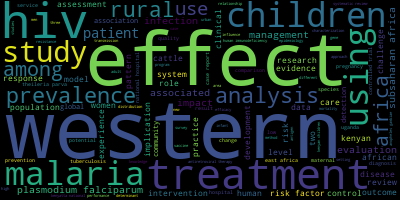

In [21]:
# word cloud of the titles of the text
# add the stopwords
stopwords = set(STOPWORDS)
stopwords.add("kenya") # common word already
stopwords.add("nairobi") # common word already

# Create a WordCloud object and remove the specified stopwords
wordcloud = WordCloud(stopwords=stopwords)

# Generate a word cloud
wordcloud.generate(joined_words)

# Visualize the word cloud
wordcloud.to_image()

In [20]:
# Latent dirichlet analysis: Part I 

In [17]:
# Latent dirichlet analysis: Part II

In [18]:
# Finding trends in with Latent dirichlet analysis

In [19]:
# Conclusion and app creation with streamlit